<a href="https://colab.research.google.com/github/karthikamanu123/Capstone-Project-6--ML/blob/main/Heart_Disease_Prediction_By_Karthika_Pradeep_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**- Heart Disease Prediction

Project Type - Classification

# Step 1 - Problem Statement





How can we leverage machine learning techniques to develop accurate and reliable models that can predict the likelihood of heart disease in individuals, enabling early intervention and preventive measures?

# Objective

To develop a machine learning model that can effectively stratify individuals into low, medium, and high-risk categories based on their clinical and demographic characteristics, enabling tailored preventive strategies and early intervention.

In [45]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2 - Data Collection

In [47]:
# load the dataset
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [48]:
# first look of this df
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [49]:
# Finding no of rows and columns
df.shape

(270, 14)

We can see that our df consists of 270 rows and 12 columns

# Step 3-Data Preprosesing

In [50]:
# finding  Duplicate values in this df
df.duplicated().sum()

0

Here we can see that there are no duplicate values in this DataFrame

In [51]:
# Checking for null or missing values
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


So,We don't have any null or missing values

In [52]:
# basic info of data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [53]:
# Desribe Dataset
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Step 4- EDA

In [54]:
# Count the frequency of unique values in the 'Sex' column
df['Sex'].value_counts()

,count
Sex,
1,183
0,87


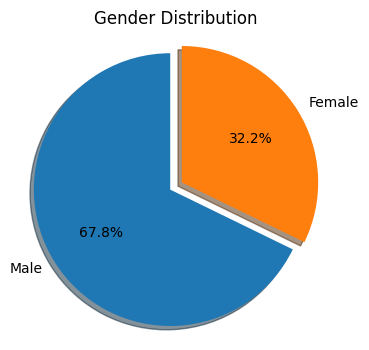

In [55]:
# Visualization
# Chart No- 1
# Creating a pie chart to show the percentage of males and females in the dataset

labels = 'Male', 'Female'
sizes = df['Sex'].value_counts()
explode = (0, 0.1)
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Gender Distribution")
plt.show()

The pie chart visually represents the distribution of male and female patients in a dataset.The chart clearly shows that a significantly larger proportion of the patients are male. The male segment occupies a larger portion of the pie, indicating a higher number of male patients compared to female patients.


*   Male: Approximately 67.8% of the patients are male.
*   Female: Approximately 32.2% of the patients are female.



In [56]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

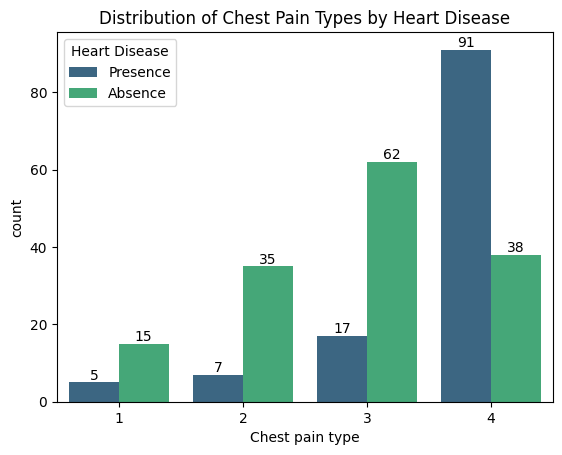

In [57]:
# Chart no- 2
# visualizing the distribution of chest pain types
ax = sns.countplot(df,x='Chest pain type',hue = 'Heart Disease',palette='viridis')
for lab in ax.containers:
    ax.bar_label(lab)
    plt.title('Distribution of Chest Pain Types by Heart Disease')

plt.show()

The chart titled "Distribution of Chest Pain Types by Heart Disease" visualizes the relationship between different chest pain types and the presence or absence of heart disease. Also, the chart shows that chest pain type 4 is strongly linked to heart disease. Other types of chest pain, especially type 1, seem less related to heart disease.

In [58]:
# Count the frequency of unique values in the 'Sex' column
df['Sex'].value_counts()

,count
Sex,
1,183
0,87


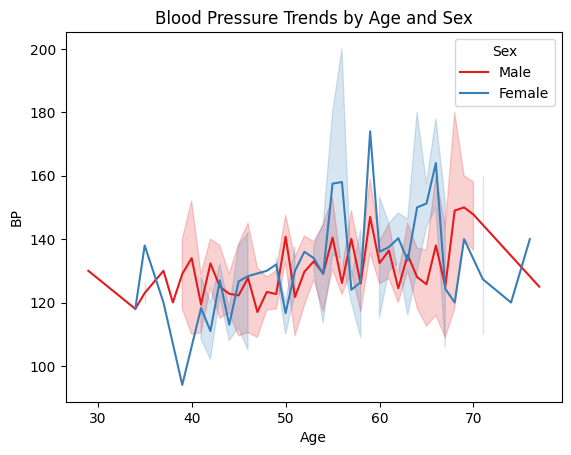

In [59]:
# Chart no - 3
# Visualization of blood pressure (BP) trends by age and sex.
df_copy = df.copy()
df_copy['Sex'] = df_copy['Sex'].replace({1: 'Male', 0: 'Female'})
sns.lineplot(df_copy,x = 'Age',y = 'BP',hue = 'Sex',palette="Set1")
plt.title('Blood Pressure Trends by Age and Sex')
plt.show()



This plot provides a visual representation of the relationship between age, sex, and blood pressure. Here we can see that, both genders generally show an increasing trend in blood pressure with age, although the rate of increase might vary.The blue line representing females shows a more pronounced increase in BP, especially after the age of 60.The red line for males indicates a somewhat steadier increase in BP compared to females, with a slight dip around the age of 40. By analysing this graph we can see that more Females in the age group of 50-70 has experienced higher Blood Pressure than Man


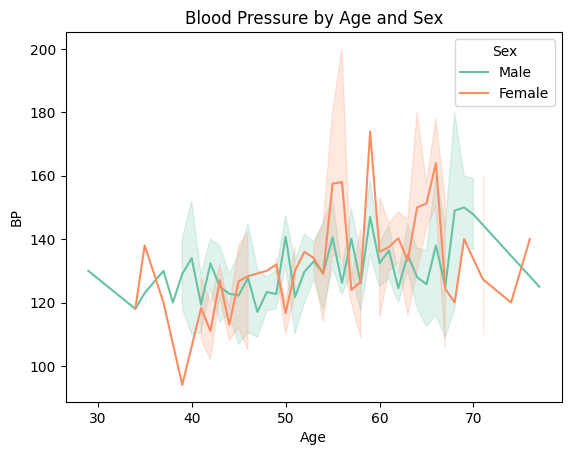

In [60]:
# Chart no - 4
# visualizing the blood pressure (BP) trends by age and sex.

sns.lineplot(df_copy,x = 'Age',y = 'BP',hue = 'Sex',palette="Set2")
plt.title('Blood Pressure by Age and Sex')
plt.show()

This plot provides a visual representation of the relationship between age, sex, and blood pressure.
Both genders generally show an increasing trend in blood pressure with age, although the rate of increase might vary.The orange line representing females shows a more pronounced increase in BP, especially after the age of 60.
The green line for males indicates a somewhat steadier increase in BP compared to females, with a slight dip around the age of 40.
Also, We can see that, More Females in the age group of 50-70 has experienced higher Cholestrol than Man.

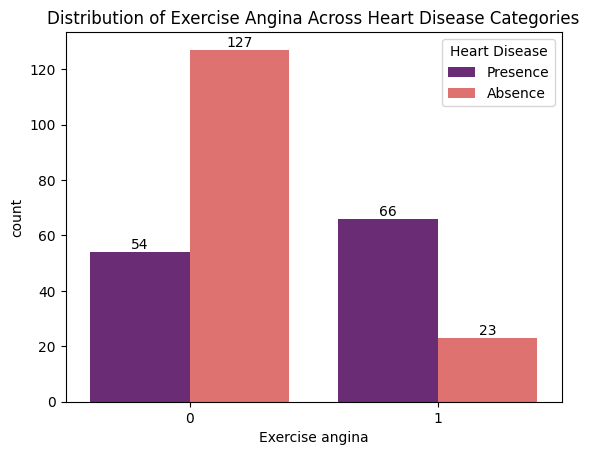

In [61]:
## 0 - False
## 1 - True
# Counts the number of patients with and without heart disease for each exercise angina category.
ax = sns.countplot(df,x ='Exercise angina',hue = 'Heart Disease',palette= "magma")
for lab in ax.containers:
    ax.bar_label(lab)
    plt.title('Distribution of Exercise Angina Across Heart Disease Categories')


Exercise angina is a common symptom of coronary artery disease (CAD). It happens when the heart muscle doesn't get enough oxygen-rich blood, usually due to narrowed coronary arteries. This reduced blood flow can cause chest pain or discomfort, particularly during physical exertion.

Key Insights from this chart:


*  Most people with heart disease experience exercise angina: The tall bar for "Presence" of heart disease shows that a large number of people with heart disease also experience exercise angina.

*  Fewer people without heart disease experience exercise angina: The shorter bars for "Absence" of heart disease indicate that fewer people without heart disease experience exercise angina.

In conclusion we can say that, People with heart disease are more likely to experience chest pain during exercise compared to those without heart disease.



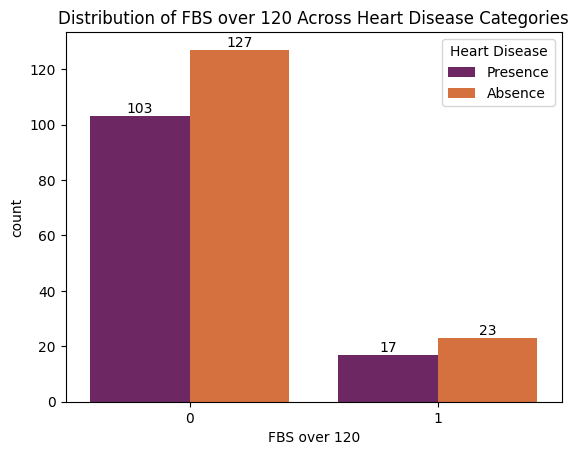

In [62]:
# Counts the number of people with and without heart disease, based on whether their fasting blood sugar is over 120.

ax = sns.countplot(df,x = 'FBS over 120',hue = 'Heart Disease',palette = "inferno")
for lab in ax.containers:
    ax.bar_label(lab)
    plt.title('Distribution of FBS over 120 Across Heart Disease Categories')

The chart shows that people with high fasting blood sugar (FBS) are more likely to have heart disease.

Key points:

*   High FBS and Heart Disease: The taller bar for "Presence" of heart disease indicates that more people with high FBS have heart disease.

*  Low FBS and Heart Disease: The shorter bar for "Presence" of heart disease shows that fewer people with normal FBS have heart disease.

Overall we can say that, having high fasting blood sugar increases the risk of heart disease.



<ipython-input-63-f72076b44378>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x = 'Heart Disease',y = 'ST depression',palette = 'coolwarm')


Text(0.5, 1.0, 'Distribution of ST Depression Across Heart Disease Categories')

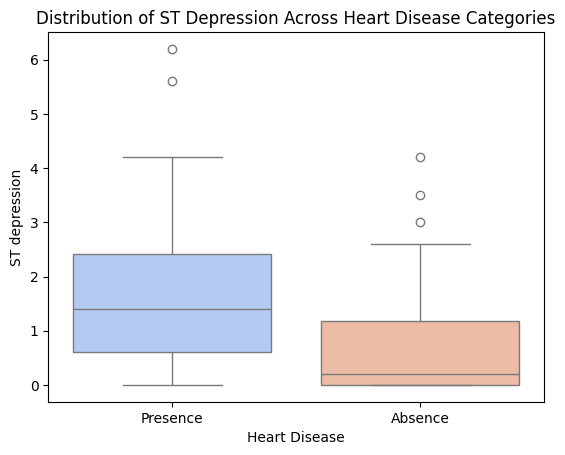

In [63]:
# Compares the distribution of ST depression between people with and without heart disease.
sns.boxplot(df,x = 'Heart Disease',y = 'ST depression',palette = 'coolwarm')
plt.title('Distribution of ST Depression Across Heart Disease Categories')

The chart shows how ST depression (a measure of heart health) varies between people with and without heart disease.

Key Insights:

*   Higher ST Depression in Heart Disease: People with heart disease generally have higher ST depression values compared to those without heart disease.

*   More Variability in Heart Disease Group: The box plot for the "Presence" group is taller, indicating more variability in ST depression among people with heart disease.

In simpler words we can say that, people with heart disease tend to have higher ST depression values, suggesting that ST depression can be an indicator of heart disease.


<ipython-input-64-40c79cfc3f92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x = 'Heart Disease',y = 'Thallium',palette = 'flare')


Text(0.5, 1.0, 'Thallium Stress Test Results by Heart Disease Status')

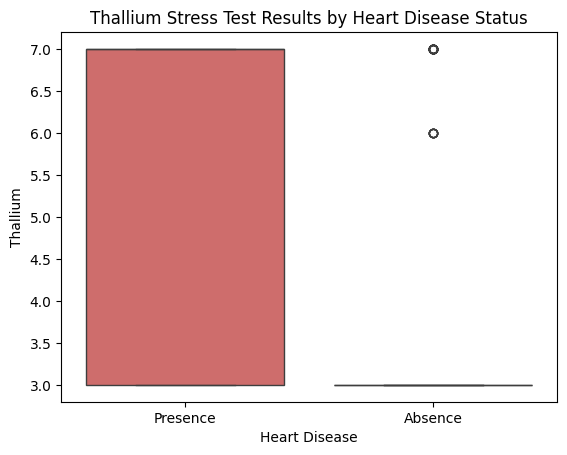

In [64]:
# Compares the distribution of Thallium stress test results between people with and without heart disease.

sns.boxplot(df,x = 'Heart Disease',y = 'Thallium',palette = 'flare')
plt.title('Thallium Stress Test Results by Heart Disease Status')

Thallium stress test is a medical test to check how well blood flows to the heart, especially during exercise. It helps doctors diagnose heart problems.

The chart shows that people with heart disease generally have higher Thallium stress test results compared to those without heart disease. This suggests that a higher Thallium value might indicate a higher risk of heart disease.

**Categorical encoding**

In [66]:
# Converting the categorical variables in to numerical variables

df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

By applying label encoding, we can directly use the "Heart Disease" column as a numerical feature in our machine learning model.

**Feature engineering**

In [25]:
# Separate features (X) and target variable (y) for model training.
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']


By separating the features and target variable, we prepare the data for further analysis and modeling.

# Step 5 - Model Selection, Training & Evaluation

**Data Splitting**

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Feature Scaling**

In [27]:
# Create a StandardScaler object

scaler = StandardScaler()

# Fit the scaler to the training data and transform it

X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler

X_test = scaler.transform(X_test)

**Label Encoding**

In [28]:
# Create a LabelEncoder object
le = LabelEncoder()
# Fit the encoder to the target variable and transform it
y = le.fit_transform(y)

 Label encoding is a useful technique for handling categorical variables.It is a technique used to convert categorical variables into numerical representations. It assigns a unique integer to each category

**Feauture Extraction**

In [29]:
# Create a PCA object with 9 principal components
pca = PCA(n_components=9)

# Fit the PCA model to the training data and transform it
X_train_trf = pca.fit_transform(X_train)

# Transform the testing data using the fitted PCA model
X_test_trf = pca.transform(X_test)

By applying PCA, we can reduce the dimensionality of the dataset, potentially improving model performance and reducing computational cost.

# Model Bulilding

We're constructing a logistic regression model to predict the probability of a binary outcome.

In [30]:
# Create and train a logistic regression model

lr = LogisticRegression()
lr.fit(X_train_trf,y_train)

LogisticRegression()

In [31]:
# Make predictions on the transformed testing data using the trained logistic regression model
y_pred = lr.predict(X_test_trf)

**Accuracy Prediction**

In [32]:
accuracy_score(y_test, y_pred)

0.8555555555555555

In [33]:
# Create a K-Nearest Neighbors classifier object
knn = KNeighborsClassifier()

In [34]:
# Train the K-Nearest Neighbors model on the transformed training data
knn.fit(X_train_trf,y_train)

# Make predictions on the transformed testing data using the trained KNN model
y_pred2 = knn.predict(X_test_trf)

In [35]:
accuracy_score(y_test, y_pred2)

0.7666666666666667

In [36]:
# Create a Support Vector Classifier object
svc = SVC()

# Train the SVC model on the transformed training data
svc.fit(X_train_trf, y_train)

# Make predictions on the transformed testing data using the trained SVC model
y_pred3 = svc.predict(X_test_trf)

# Evaluate the SVC model's accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy of SVC:", accuracy)

Accuracy of SVC: 0.8222222222222222


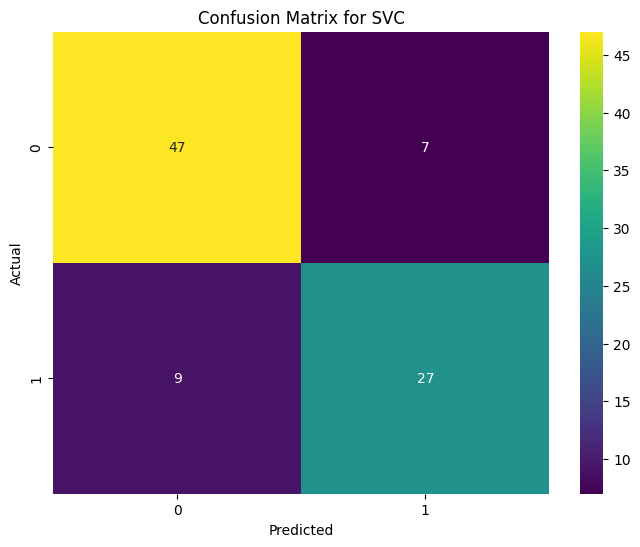

In [42]:
# Confusion matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred3)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()


Based on the provided confusion matrix, the model exhibits reasonable performance with a higher accuracy for the negative class compared to the positive class. The model is effective in correctly classifying negative instances.

In [37]:
# Create a Random Forest Classifier object with hyperparameters
rf = RandomForestClassifier(n_estimators=50, random_state=2)

# Train the Random Forest model on the transformed training data
rf.fit(X_train_trf, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

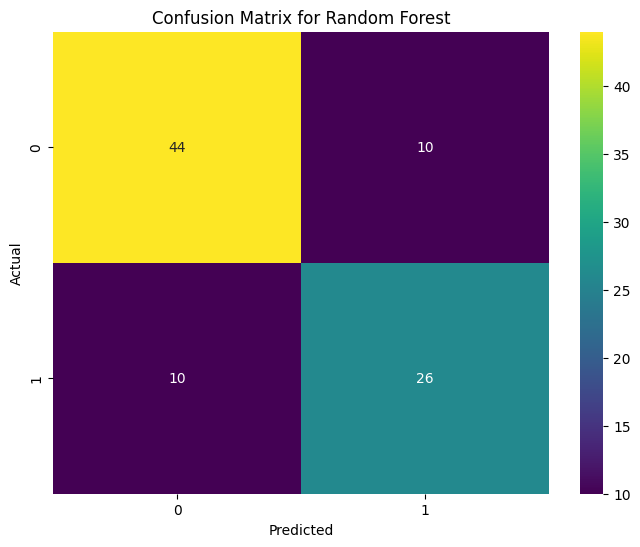

In [44]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred4)


# Plotiing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

The Random Forest model exhibits a reasonable performance, correctly classifying a majority of instances.

In [67]:
y_pred4 = rf.predict(X_test_trf)
accuracy_score(y_test, y_pred4)

0.7777777777777778

# Conclusion

The Support Vector Machine (SVM) model outperformed the Random Forest model in terms of accuracy. The SVM model achieved an accuracy of 0.8222, indicating a higher predictive capability.
Our model accurately predicts heart disease in 82.22% of cases, enabling early detection and intervention.

# Recommendations for Marketing Strategies

To effectively market the heart disease prediction model with an accuracy of 82.22%, we recommend focusing on the following strategies:


*   Target Audience: Healthcare providers, health insurance companies, and the general public.
*  Marketing Channels: Leverage digital marketing, content marketing, public relations, and direct marketing.

*   KPIs: Monitor adoption rate, accuracy, user satisfaction, and cost-effectiveness.

By implementing these strategies, we can promote the model's adoption, improve public health outcomes, and establish a strong brand reputation.



